<center>
    <h1> Tarea 3 / INF285 - Computación Científica </h1>
    <h2> Camilo Saldías González </h2>
    <h2> 201223512-k | camilo.saldias.12@sansano.usm.cl </h2>
</center>

_Abril 2017_

In [176]:
from PIL import Image
import glob
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from ipywidgets import widgets
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Introducción

A continuación se prsentan los desarrollos a las preguntas de la Tarea 3 de Computación Científica, dedicada al análisis de imágenes mediante la manipulación de matrices.

## Pregunta 1 (35 puntos)

Implementar el algoritmo PCA (Leer PDF adjunto) para proyectar los vectores de datos (imágenes en _pickle 1_) utilizando los 3 vectores asociados a los **valores singulares** que usted estime conveniente. ¿Por qué eligió esos vectores propios?

In [177]:
def get_pca(data, k):
    #Primer paso: calculamos el SVD de la matriz data
    #Dejamos full_matrices = False para agilizar el cálculo
    U, S, V = np.linalg.svd(data, full_matrices = False)
    #Cambiamos la base de la matriz de datos
    V = V[:k]
    transformed_data = data.dot(np.transpose(V))
    #Devolvemos la matriz bajo la nueva base
    return (U*np.diag(S), transformed_data)

datos_pickle1 = pickle.load(open("pickle1.pkl", "rb"))
datos_pickle1 = np.asarray(datos_pickle1)
image_list_pickle1 = []

#datos_pickle1 es un array con 88 imagenes, de la 0 a la 87 (384x286)
for imagen in datos_pickle1:
    im = sp.misc.imresize(imagen,(100,100))
    im = np.resize(im, (1,10000))
    imarray = im.reshape(-1)
    image_list_pickle1.append(imarray)
image_list_pickle1 = np.asarray(image_list_pickle1)

#Calculamos la media de cada columna de la matriz de datos, para luego restar estas medias a cada columna de nuestra matriz. 
#Luego dividimos la matriz completa por 255 para que la magnitud de nuestros datos estén entre [0,1].
mean = image_list_pickle1.mean(axis=0)
data_pickle1 = image_list_pickle1 - mean[None,:]
data_pickle1 = data_pickle1/255

prod1, data_3d_pickle1 = get_pca(data_pickle1, 3)
print(data_3d_pickle1)

[[ -5.47465988  -3.34759285 -13.29205103]
 [  9.08405914   9.91441487  -5.49758487]
 [  7.60613197   9.92265565  -5.65063547]
 [  6.48224688   9.50915636  -4.40719928]
 [  6.97018532   9.83303106  -4.53767681]
 [ 14.91001033   8.96366202  -2.90224086]
 [ 14.56703458   8.7256067   -2.98450653]
 [ 14.54809138   8.24396796  -3.64044014]
 [ 15.12779142   8.14869377  -2.37223766]
 [ 13.55618571  -4.47793904  -2.57401453]
 [ 13.39999313  -4.60540053  -2.00091968]
 [ 13.8661992   -4.40519947  -3.97998391]
 [ 13.67749827  -4.4626869   -3.40593978]
 [ 13.53984864  -4.58549308  -3.30328594]
 [ 13.54180266  -4.60561971  -3.05652461]
 [ 12.93177467  -4.28982677  -1.87791505]
 [ 12.91124019  -4.47192626  -1.76692894]
 [ 18.78753724  -0.02196227  -0.31285032]
 [ 18.05669047   0.4904097    1.24622689]
 [ 18.015853    -0.30193192   1.97720218]
 [ 18.59951024   0.73415958   2.55741159]
 [ 18.20933378   0.88673137   1.74197668]
 [ 18.48106503   0.49504095   1.6637705 ]
 [ 18.26871579  -1.32803322   1.25

En esta pregunta se escogieron los 3 primeros vectores propios, los cuales en este caso están asociados a los 3 mayores valores propios. Se escogieron los primeros vectores propios (o mejor dicho, los 3 vectores propios asociados a los 3 mayores valores propios) porque estos son los que poseen la mayor cantidad de información dentro de la matriz, pudiendo descartar el resto para efectos del cambio de base.

## Pregunta 2 (25 puntos)

* (10 puntos) Utilizando las imágenes que están en el _pickle 2_, usted deberá encontrar los 5 vecinos más cercanos (esto quiere decir encontrar las 5 imágenes que estén a la menor norma **vectorial** euclidiana de nuestra imagen) para cada una de las imágenes utilizando los **vectores proyectados** obtenidos en la pregunta anterior. Usted deberá devolver los índices de las imágenes y las distancias ordenadas de menor a mayor, e ingresar estos números en la función que se encuentra a continuación. ¿Que puede decir acerca de los resultados? Concluya.

In [178]:
def show_image(dataset,indices,mean,original,distance):
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
    ax1.imshow(np.reshape(original*255 + mean[None,:],(100,100)), cmap='gray')
    ax2.imshow(np.reshape(dataset[indices[0],]*255 + mean[None,:],(100,100)), cmap='gray')
    ax3.imshow(np.reshape(dataset[indices[1],]*255 + mean[None,:],(100,100)), cmap='gray')
    ax4.imshow(np.reshape(dataset[indices[2],]*255 + mean[None,:],(100,100)), cmap='gray')
    ax5.imshow(np.reshape(dataset[indices[3],]*255 + mean[None,:],(100,100)), cmap='gray')
    ax6.imshow(np.reshape(dataset[indices[4],]*255 + mean[None,:],(100,100)), cmap='gray')
    ax1.set_title('Original')
    ax2.set_title('distancia '+str(distance[0]))
    ax3.set_title('distancia '+str(distance[1]))
    ax4.set_title('distancia '+str(distance[2]))
    ax5.set_title('distancia '+str(distance[3]))
    ax6.set_title('distancia '+str(distance[4]))
    plt.show()

def getMenorDistancia(vec, data):
    #Calculamos la distancia de nuestro vector con todos los vectores de la matriz
    dist = [(np.linalg.norm(vec-data[i]), i) for i in range(len(data))]
    #Ordenamos las distancias, y nos quedamos con las 5 más cortas
    dist.sort(key=lambda x: x[0])
    dist = dist[:5]
    #Ordenamos los indices y distancias en un formato presentable
    index = np.array([n[1] for n in dist])+4
    dist = np.array([n[0] for n in dist])
    return index, dist        

In [179]:
#Abrimos los datos del pickle 2
datos_pickle2 = pickle.load(open("pickle2.pkl", "rb"))
datos_pickle2 = np.asarray(datos_pickle2)
image_list_pickle2 = []

#datos_pickle2 es un array con 4 imagenes, de la 0 a la 3 (384x286)
for imagen in datos_pickle2:
    im = sp.misc.imresize(imagen,(100,100))
    im = np.resize(im, (1,10000))
    imarray = im.reshape(-1)
    image_list_pickle2.append(imarray)
image_list_pickle2 = np.asarray(image_list_pickle2)

#Combinamos las imagenes de ambos pickles en un solo array, para obtener el PCA
#Esto nos permite utilizar una única media a futuro, además de simplificar el procedimiento de comparación posterior
image_list_pickle2 = np.append(np.asarray(image_list_pickle2), 255*data_pickle1+mean[None,:], axis = 0)
#Calculamos la media de cada columna de la matriz de datos.
#Luego dividimos la matriz completa por 255 para que la magnitud de nuestros datos estén entre [0,1].
mean_pickle2 = image_list_pickle2.mean(axis=0)
data_pickle2 = image_list_pickle2 - mean_pickle2[None,:]
data_pickle2 = data_pickle2/255

prod2, data_3d_pickle2 = get_pca(data_pickle2, 3)
print(data_3d_pickle2)

[[ -6.49048803e+00  -3.28882230e+00   1.06305343e+00]
 [  5.72406845e+00   4.33687445e+00   1.51551506e+01]
 [ -8.62126914e+00  -9.38112675e+00   5.15405562e+00]
 [  1.82425602e+01  -2.71821024e+00   2.61329679e+00]
 [  5.52761868e+00   4.16474451e+00   1.55986462e+01]
 [ -9.45606563e+00  -1.14257852e+01   5.04387313e+00]
 [ -7.95254241e+00  -1.14114921e+01   5.05292527e+00]
 [ -6.81236817e+00  -1.08724643e+01   3.70668956e+00]
 [ -7.29586505e+00  -1.12290639e+01   3.73223864e+00]
 [ -1.52530826e+01  -1.00265290e+01   2.44053570e+00]
 [ -1.49120363e+01  -9.78088754e+00   2.56168685e+00]
 [ -1.48953217e+01  -9.38684539e+00   3.22250318e+00]
 [ -1.54514405e+01  -9.18735109e+00   1.81597933e+00]
 [ -1.35289350e+01   5.11642758e+00   2.15308269e+00]
 [ -1.33747263e+01   5.19750716e+00   1.55303406e+00]
 [ -1.38358348e+01   4.97507531e+00   3.50688997e+00]
 [ -1.36389964e+01   5.08822214e+00   2.98178225e+00]
 [ -1.35022234e+01   5.20246679e+00   2.89087060e+00]
 [ -1.35060441e+01   5.22715

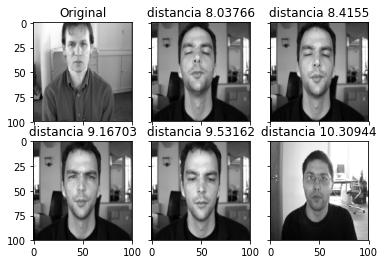

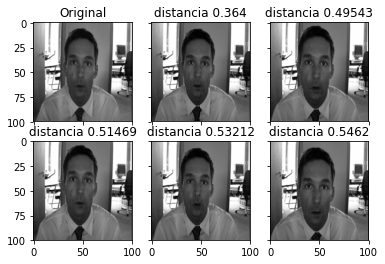

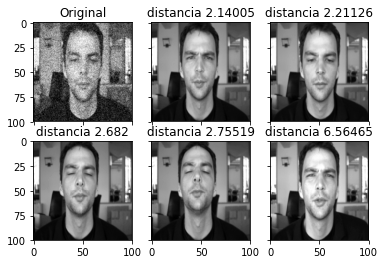

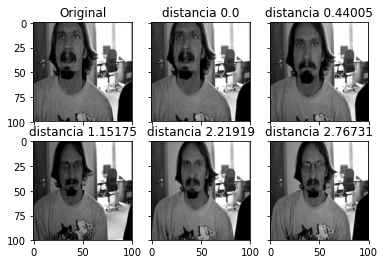

In [180]:
for j in range(4):
    index, dist = getMenorDistancia(data_3d_pickle2[j], data_3d_pickle2[4:])
    show_image(data_pickle2, index, mean_pickle2, data_pickle2[j], np.round(dist, decimals=5))

En todos los casos con excepción del primero, se logran encontrar imágenes similares a la imagen original, en las cuales las variaciones respecto a la imagen original son mínimas. Sin embargo, en el caso de la primera imagen no se logró encontrar imágenes visiblemente similares, quizás porque dentro del conjunto de imágenes no existen imágenes similares que correspondan a la misma persona (en este caso, las imágenes similares corresponden a una persona distitna a la de la imagen original).

* (10 puntos) Reconstruir utilizando su data proyectada las 5 imágenes más cercanas encontradas en el ejercicio anterior. ¿Qué puede decir sobre estas imágenes? Concluya.

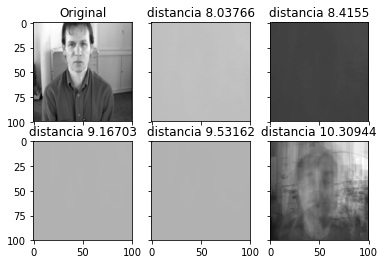

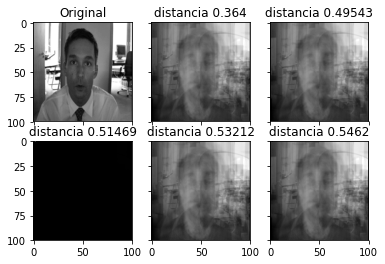

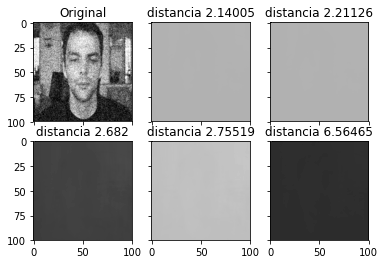

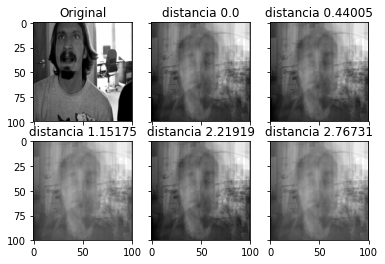

In [181]:
#Reconstruimos los datos a partir de las proyecciones.
#Rellenamos con ceros los espacios faltantes para completar el tamaño
rebuilt_img = np.matmul(prod2, np.append(data_3d_pickle2, np.zeros((92, 10000-3)), axis=1))
for j in range(4):
    index, dist = getMenorDistancia(data_3d_pickle2[j], data_3d_pickle2[4:])
    show_image(rebuilt_img, index, mean_pickle2, data_pickle2[j], np.round(dist, decimals=5))

Ninguna de las imágenes cercanas reconstruidas es remotamente similar a alguna de las imágenes originales, llegando a ser un simple cuadro de tonalidad "plana", como en algunas de las imágenes proyectadas del primer y tercer caso. Esto puede deberse a la falta de información para poder reconstruir adecuadamente las imágenes, considerando que se descartó gran parte de la información de las imágenes originales al realizar el cambio de base.

## Pregunta 3 (10 puntos)

Volver a realizar el desarrollo de la pregunta 2 pero esta vez utilizando 10 vectores propios.

In [182]:
#Abrimos los datos del pickle 2
datos_pickle2 = pickle.load(open("pickle2.pkl", "rb"))
datos_pickle2 = np.asarray(datos_pickle2)
image_list_pickle2 = []

#datos_pickle2 es un array con 4 imagenes, de la 0 a la 3 (384x286)
for imagen in datos_pickle2:
    im = sp.misc.imresize(imagen,(100,100))
    im = np.resize(im, (1,10000))
    imarray = im.reshape(-1)
    image_list_pickle2.append(imarray)
image_list_pickle2 = np.asarray(image_list_pickle2)

#Combinamos las imagenes de ambos pickles en un solo array, para obtener el PCA
image_list_pickle2 = np.append(np.asarray(image_list_pickle2), 255*data_pickle1+mean[None,:], axis = 0)
#Calculamos la media de cada columna de la matriz de datos.
#Luego dividimos la matriz completa por 255 para que la magnitud de nuestros datos estén entre [0,1].
mean_pickle2 = image_list_pickle2.mean(axis=0)
data_pickle2 = image_list_pickle2 - mean_pickle2[None,:]
data_pickle2 = data_pickle2/255

#Ahora con 10 vectores!
prod2_10d, data_10d_pickle2 = get_pca(data_pickle2, 10)
print(data_10d_pickle2)

[[ -6.49048803e+00  -3.28882230e+00   1.06305343e+00  -2.09158197e+00
    8.92595048e+00  -2.68605614e-01   5.21771687e-01  -2.08332619e+00
    6.57220488e-01  -2.08516120e+00]
 [  5.72406845e+00   4.33687445e+00   1.51551506e+01  -9.51411685e+00
    8.87655597e+00  -2.80931828e+00   3.72032942e+00  -3.42938776e+00
   -9.69122951e-02   2.52789210e-01]
 [ -8.62126914e+00  -9.38112675e+00   5.15405562e+00   1.23567558e+01
    7.36581104e+00   4.13930390e+00   2.74631318e+00   2.01627450e+00
    7.32889156e-01  -1.37720738e-01]
 [  1.82425602e+01  -2.71821024e+00   2.61329679e+00   8.59772680e+00
    2.03454323e+00  -4.04542946e+00  -1.24928296e+01   1.59891216e-01
    1.34330615e+00  -4.10054072e-01]
 [  5.52761868e+00   4.16474451e+00   1.55986462e+01  -9.09942630e+00
    8.64039634e+00  -2.93127674e+00   3.66298516e+00  -2.90317965e+00
    8.93850468e-02   1.09096853e+00]
 [ -9.45606563e+00  -1.14257852e+01   5.04387313e+00   1.38050997e+01
    8.75052188e+00   5.05014806e+00   3.17478

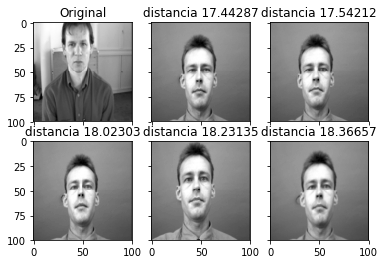

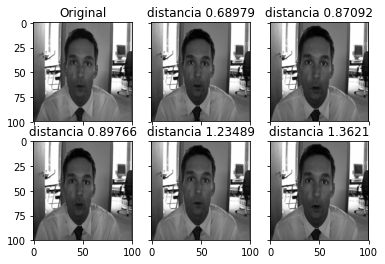

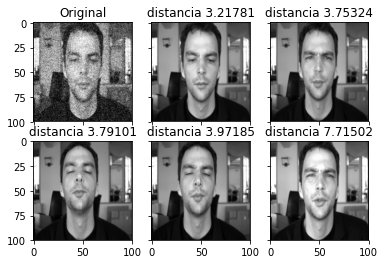

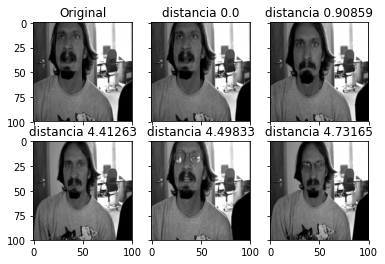

In [183]:
for j in range(4):
    index, dist = getMenorDistancia(data_10d_pickle2[j], data_10d_pickle2[4:])
    show_image(data_pickle2, index, mean_pickle2, data_pickle2[j], np.round(dist, decimals=5))

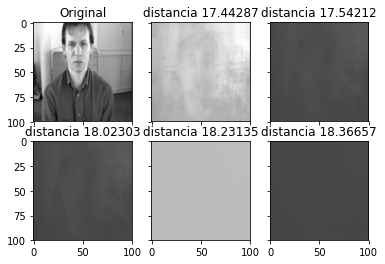

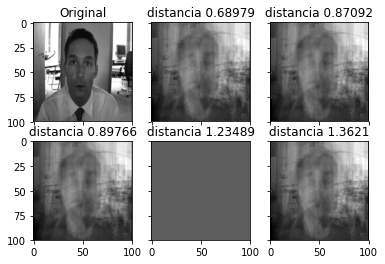

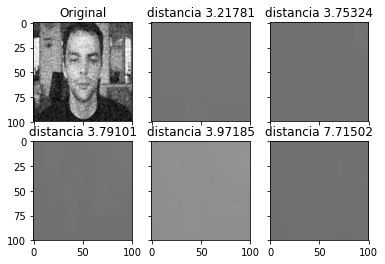

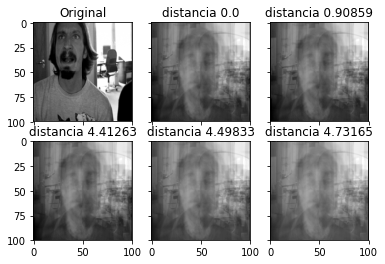

In [184]:
rebuilt_img_10d = np.matmul(prod2_10d, np.append(data_10d_pickle2, np.zeros((92, 10000-10)), axis=1))
for j in range(4):
    index, dist = getMenorDistancia(data_10d_pickle2[j], data_10d_pickle2[4:])
    show_image(rebuilt_img_10d, index, mean_pickle2, data_pickle2[j], np.round(dist, decimals=5))

## Pregunta 4 (30 puntos)

Utilizando las imágenes reconstruidas de la pregunta 2 y 3, calcular la norma del error entre las imágenes originales y las reconstruidas, utilizando la norma 2. ¿Existe alguna relación entre la norma euclideana obtenida anteriormente con la norma matricial obtenida acá? ¿Afecta la cantidad de vectores **singulares** utilizados? Concluya usando sus gráficos.

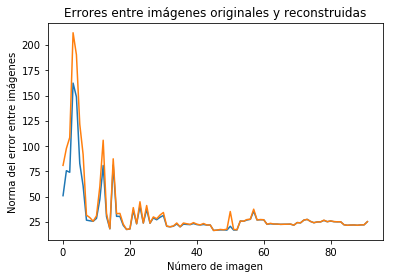

In [185]:
dist_3d = []
dist_10d = []
for i in range(len(data_pickle2)):
    dist_3d.append(np.linalg.norm(data_pickle2[i] - rebuilt_img[i]))
    dist_10d.append(np.linalg.norm(data_pickle2[i] - rebuilt_img_10d[i]))

plt.plot(range(len(data_pickle2)), dist_3d, range(len(data_pickle2)), dist_10d)
plt.title('Errores entre imágenes originales y reconstruidas')
plt.ylabel('Norma del error entre imágenes')
plt.xlabel('Número de imagen')
plt.show()

Del gráfico anterior, se puede observar que la cantidad de vectores singulares utilizados en cada caso afecta en cierta forma la magnitud del error respecto a las imágenes originales. Sin embargo, y contrario a lo que se esperaría normalmente, una alza en el número de vectores singulares utilizados no implicó una disminución generalizada del error, siendo en algunos casos más alto que el error obtenido con un número menor de vectores singulares. Esto podría indicar un problema en alguno de los procedimientos que aquí se llevaron a cabo, lo que tendría que ser estudiado con mayor detención en un futuro.

# Conclusiones

A través de las preguntas desarrolladas anteriormente, se logró entender la importancia fundamental que juega el análisis de matrices en varias tareas que a simple vista parecen sencillas, como la comparación de imágenes. Además, esta tarea nos ayudó a vislumbrar los problemas que somos capaces de resolver con el adecuado manejo de matrices, y también las complejidades de manipular grandes matrices con millones de datos, en algunos casos incluso más. Lo anterior realza la importancia de contar con algoritmos y métodos eficientes y rápidos, sobre todo cuando cada cálculo contempla una cantidad considerable de tiempo para ser llevado a cabo.

<div id='obj' />
# Referencias

* _Markdown_ https://help.github.com/articles/basic-writing-and-formatting-syntax/
* _numpy_ http://www.numpy.org
* _scipy_ https://www.scipy.org/scipylib/index.html
* _SVD_ https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
* _PyPlot tutorial_ https://matplotlib.org/users/pyplot_tutorial.html